<br><br><br><br>
# Shelter Animal Outcomes
### 동물보호소의 동물들의 Outcome 예측
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<div style="text-align:right"><span style = " font-size:30px">**지민상**&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;</span></div>
<br>
<div style="text-align:right">이**지**홍 김**민**경 박**상**훈 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;</div>
<br><br><br><br><br><br><br><br><br><br><br><br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')

## train data 형태 확인

In [3]:
df.loc[0]

AnimalID                        A671945
Name                            Hambone
DateTime            2014-02-12 18:22:00
OutcomeType             Return_to_owner
OutcomeSubtype                      NaN
AnimalType                          Dog
SexuponOutcome            Neutered Male
AgeuponOutcome                   1 year
Breed             Shetland Sheepdog Mix
Color                       Brown/White
Name: 0, dtype: object

In [4]:
df.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


In [5]:
df['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [6]:
df['OutcomeSubtype'].value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [7]:
df['AnimalType'].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

In [8]:
df['SexuponOutcome'].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [9]:
df['AgeuponOutcome'].value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
9 years       288
7 months      288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
4 days         50
6 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

In [10]:
df['Breed'].value_counts()

Domestic Shorthair Mix                                8810
Pit Bull Mix                                          1906
Chihuahua Shorthair Mix                               1766
Labrador Retriever Mix                                1363
Domestic Medium Hair Mix                               839
German Shepherd Mix                                    575
Domestic Longhair Mix                                  520
Siamese Mix                                            389
Australian Cattle Dog Mix                              367
Dachshund Mix                                          318
Boxer Mix                                              245
Miniature Poodle Mix                                   233
Border Collie Mix                                      229
Australian Shepherd Mix                                163
Rat Terrier Mix                                        157
Catahoula Mix                                          157
Jack Russell Terrier Mix                               1

In [11]:
df['Color'].value_counts()

Black/White                  2824
Black                        2292
Brown Tabby                  1635
Brown Tabby/White             940
White                         931
Brown/White                   884
Orange Tabby                  841
Tan/White                     773
Tricolor                      752
Blue/White                    702
Black/Tan                     672
White/Black                   643
Brown                         639
Tan                           628
White/Brown                   569
Tortie                        530
Calico                        517
Orange Tabby/White            455
Blue                          450
Brown Brindle/White           450
Black/Brown                   436
Blue Tabby                    433
White/Tan                     389
Red                           337
Torbie                        335
Brown/Black                   333
Red/White                     331
Blue Tabby/White              241
Brown Brindle                 232
Chocolate/Whit

    - 10개의 Column
        - AnimalID, Name, DateTime, OutcomeType, OutcomeSubtype, AnimalType, SexuponOutcome, AgeuponOutcome, Breed, Color
    1. 각 동물은 AnimalID 라는 고유의 값을 가짐
    2. Name에 NaN 값이 존재
    3. DateTime
    4. OutcomeType은 5가지
        - Adoption, Transfer, Return_to_owner, Euthanasia, Died
    5. OutcomeSubtype은 16가지
        - NaN 존재
    6. AnimalType은 2가지
        - Dog, Cat
    7. SexuponOutcome은 4가지
        - Neutered Male(중성화 수컷), Spayed Female(중성화 암컷), Intact Male(수컷), Intact Female(암컷)
    8. AgeuponOutcome은 매우 다양
    9. Breed(품종), 1380종
    10. Color
    
- 전처리 필요한 변수들
    - Name
    - DateTime
    - AgeuponOutcome
        - 일수로 바꾸어 계산이 필요
    - Breed
        - 크기(소/중/대), 품종(순종/믹스), 장/단모 등
    - Color

# 전처리

In [12]:
df.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

### Name
* 이름의 유무로 분류

In [13]:
def Naming(x):
    if type(x) == float:
        return 'Unnamed'
    else:
        return 'Named'

In [14]:
df['Name'] = df['Name'].transform(Naming)

In [15]:
df['Name'].value_counts()

Named      19038
Unnamed     7691
Name: Name, dtype: int64

### SexuponOutcome
* 중성화 여부를 Neutered로 통일

In [16]:
df['SexuponOutcome'] = df['SexuponOutcome'].fillna('Unknown')

In [17]:
def intact(x):
    if 'Neutered' in x or 'Spayed' in x:
        return 'Neutered'
    elif 'Male' in x:
        return 'Male'
    elif 'Female' in x:
        return 'Female'
    else:
        return 'Unknown'

In [18]:
df['SexuponOutcome'] = df['SexuponOutcome'].apply(intact)

In [19]:
df.SexuponOutcome.value_counts()

Neutered    18599
Male         3525
Female       3511
Unknown      1094
Name: SexuponOutcome, dtype: int64

### AgeuponOutcome
* 일(day)로 단위를 통일

In [20]:
def Agebyday(x):
    num, unit = x.split(' ')
    if unit == 'year' or unit == 'years':
        x = int(num) * 365
    elif unit == 'month' or unit == 'months':
        x = int(num) * 30
    elif unit == 'week' or unit == 'weeks':
        x = int(num) * 7
    elif unit == 'day' or unit == 'days':
        x = int(num)
    return x

In [21]:
df['AgeuponOutcome'] = df['AgeuponOutcome'].fillna('0 day')

In [22]:
df['AgeuponOutcome'] = df['AgeuponOutcome'].apply(Agebyday)

In [23]:
# 변경 여부를 확인하고, 0이 40건임을 확인
df['AgeuponOutcome'].value_counts()

365     3969
730     3742
60      3397
1095    1823
30      1281
90      1277
1460    1071
1825     992
120      888
2190     670
21       659
150      652
180      588
2920     536
2555     531
14       529
300      457
3650     446
240      402
28       334
7        317
210      288
3285     288
4380     234
270      224
330      166
4745     143
4015     126
3        109
2         99
5110      97
5475      85
1         66
6         50
4         50
0         40
5840      36
5         24
6205      17
35        11
6570      10
6935       3
7300       2
Name: AgeuponOutcome, dtype: int64

### Breed
* 순종여부 분류 

In [24]:
def Breed2(x):
    if '/' in x or 'Mix' in x:
        return 'Mix'
    else:
        return 'Pure'

In [25]:
df['Breed2'] = df['Breed'].apply(Breed2)

In [26]:
df['Breed2'].value_counts()

Mix     25338
Pure     1391
Name: Breed2, dtype: int64


* American Kernel Club의 기준에 따른 품종군 분류 (Working, Toy, Terrier, Herding, Sporting, Non-sporting) 
* Pure, Mix 여부는 먼저 파악하였으므로, 이번엔 Breed를 파악
* Breed는 AKC 분류를 기준으로 분류한다,
* /로 표시된 경우, 앞의 Breed를 기준으로 한다.
* AKC에 없는 경우, 고양이로 분류하도록 함.

In [27]:
df['Breed'].head()

0          Shetland Sheepdog Mix
1         Domestic Shorthair Mix
2                   Pit Bull Mix
3         Domestic Shorthair Mix
4    Lhasa Apso/Miniature Poodle
Name: Breed, dtype: object

In [28]:
Breed = pd.read_csv('data/breed.csv')

In [29]:
Breed.head()

,Breed,Type
0,Affenpinscher,Toy
1,Afghan Hound,Hound
2,Airedale Terrier,Terrier
3,Akita,Working
4,Alaskan Malamute,Working


In [30]:
def breed_optimal(x):
    if '/' in x:
        x = x[0:x.index('/')]
        return x
    elif ' Mix' in x:
        x = x[0:-4]
        return x
    else:
        return x

In [31]:
df['Breed'] = df['Breed'].apply(breed_optimal)

In [32]:
df['Breed'] = df['Breed'].replace('Pit Bull', 'Bull Terrier')
df['Breed'] = df['Breed'].replace('German Shepherd', 'German Shepherd Dog')
df['Breed'] = df['Breed'].replace('Anatol Shepherd', 'Anatolian Shepherd Dog')
df['Breed'] = df['Breed'].replace('Catahoula', 'Catahoula Cur')
df['Breed'] = df['Breed'].replace('Staffordshire', 'American Staffordshire Terrier')
df['Breed'] = df['Breed'].replace('Doberman Pinsch', 'Doberman Pinscher')
df['Breed'] = df['Breed'].replace('Queensland Heeler', 'Australian Cattle Dog')
df['Breed'] = df['Breed'].replace('Flat Coat Retriever', 'Flat-Coated Retriever')
df['Breed'] = df['Breed'].replace('Chinese Sharpei', 'Chinese Shar Pei')
df['Breed'] = df['Breed'].replace('Rhod Ridgeback', 'Rhodesian Ridgeback')
df['Breed'] = df['Breed'].replace('Soft Coated Wheaten Terrier', 'Soft-Coated Wheaten Terrier')
df['Breed'] = df['Breed'].replace('Bruss Griffon', 'Brussels Griffon')
df['Breed'] = df['Breed'].replace('Redbone Hound', 'Redbone Coonhound')
df['Breed'] = df['Breed'].replace('West Highland', 'West Highland White Terrier')
df['Breed'] = df['Breed'].replace('Wire Hair Fox Terrier', 'Wire Fox Terrier')
df['Breed'] = df['Breed'].replace('Dogo Argentino', 'Mastiff')
df['Breed'] = df['Breed'].replace('Alaskan Husky', 'Alaskan Malamute')
df['Breed'] = df['Breed'].replace('Pbgv', 'Petit Basset Griffon Vendeen')
df['Breed'] = df['Breed'].replace('Chesa Bay Retr', 'Chesapeake Bay Retriever')
df['Breed'] = df['Breed'].replace('Cavalier Span', 'Cavalier King Charles Spaniel')
df['Breed'] = df['Breed'].replace('Dutch Shepherd', 'Dutch Shepherd Dog')
df['Breed'] = df['Breed'].replace('English Coonhound', 'American English Coonhound')
df['Breed'] = df['Breed'].replace('American Eskimo', 'American Eskimo Dog')
df['Breed'] = df['Breed'].replace('Bluetick Hound', 'Bluetick Coonhound')
df['Breed'] = df['Breed'].replace('Patterdale Terr', 'Patterdale Terrier')
df['Breed'] = df['Breed'].replace('Chinese Crested', 'Chinese Crested Dog')
df['Breed'] = df['Breed'].replace('Podengo Pequeno', 'Portuguese Podengo Pequeno')
df['Breed'] = df['Breed'].replace('Dogue De Bordeaux', 'Dogue de Bordeaux')
df['Breed'] = df['Breed'].replace('Boykin Span', 'Boykin Spaniel')
df['Breed'] = df['Breed'].replace('Landseer', 'Newfoundland')
df['Breed'] = df['Breed'].replace('Schnauzer Giant', 'Giant Schnauzer')
df['Breed'] = df['Breed'].replace('Glen Of Imaal', 'Glen of Imaal Terrier')
df['Breed'] = df['Breed'].replace('Treeing Cur', 'Treeing Walker Coonhound')
df['Breed'] = df['Breed'].replace('Bedlington Terr', 'Bedlington Terrier')
df['Breed'] = df['Breed'].replace('Picardy Sheepdog', 'Berger Picard')
df['Breed'] = df['Breed'].replace('Presa Canario', 'Mastiff')
df['Breed'] = df['Breed'].replace('Nova Scotia Duck Tolling Retriever', 'Nova Scotia Duck-Tolling Retriever')
df['Breed'] = df['Breed'].replace('Port Water Dog', 'Portuguese Water Dog')
df['Breed'] = df['Breed'].replace('Mexican Hairless', 'American Hairless Terrier')
df['Breed'] = df['Breed'].replace('Treeing Tennesse Brindle', 'Treeing Walker Coonhound')
df['Breed'] = df['Breed'].replace('Entlebucher', 'Entlebucher Mountain Dog')
df['Breed'] = df['Breed'].replace('Sealyham Terr', 'Sealyham Terrier')
df['Breed'] = df['Breed'].replace('Black', 'Black and Tan Coonhound')
df['Breed'] = df['Breed'].replace('Unknown', 'Chihuahua Shorthair')

In [33]:
df = df.join(Breed.set_index('Breed'), on='Breed')

In [34]:
df['Type'] = df['Type'].fillna('Cat')

In [35]:
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Breed2,Type
0,A671945,Named,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered,365,Shetland Sheepdog,Brown/White,Mix,Herding
1,A656520,Named,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Neutered,365,Domestic Shorthair,Cream Tabby,Mix,Cat
2,A686464,Named,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered,730,Bull Terrier,Blue/White,Mix,Terrier
3,A683430,Unnamed,2014-07-11 19:09:00,Transfer,Partner,Cat,Male,21,Domestic Shorthair,Blue Cream,Mix,Cat
4,A667013,Unnamed,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered,730,Lhasa Apso,Tan,Mix,Non-Sporting


<br><br><br><br>

### Color
* 해당 개체의 주된 색상과 혼합여부

In [36]:
# number of color 색상의 갯수, 0은 한색, 1은 두색이상
def get_num(x):
    x = str(x)
    if x.find('/') >= 0: return 1
    else: return 0

df['numCol'] = df.Color.apply(get_num)

In [37]:
# Color 단순화 1단계 '/' 풀기
from pandas import Series

bymain = []

for i in df['Color']:
    i = str(i)
    if i.find('/') >= 0:
        f, s = i.split('/')
        bymain.append(f)
    else:
        bymain.append(i)

df['Color'] = Series(bymain)

In [38]:
def get_mainC(x):
    x = str(x)
    if x.find('Black') >= 0: return 'dark'
    if x.find('White') >= 0: return 'light'
    if x.find('Brown') >= 0: return 'dark'
    if x.find('Orange') >= 0: return 'light'
    if x.find('Blue') >= 0: return 'medium'
    if x.find('Red') >= 0: return 'medium'
    
    if x.find('Tan') >= 0: return 'medium'
    if x.find('Tortie') >= 0: return 'dark'
    if x.find('Calico') >= 0: return 'medium'
    if x.find('Torbie') >= 0: return 'medium'
    if x.find('Buff') >= 0: return 'light'
    if x.find('Sable') >= 0: return 'dark'
    if x.find('Cream') >= 0: return 'light'
    if x.find('Yellow') >= 0: return 'light'
    if x.find('Lynx') >= 0: return 'light'
    if x.find('Chocolate') >= 0: return 'dark'
    if x.find('Gray') >= 0: return 'dark'
    if x.find('Liver') >= 0: return 'dark'
    if x.find('Flame') >= 0: return 'light'
    if x.find('Agouti') >= 0: return 'dark'
    if x.find('Pink') >= 0: return 'light'
    if x.find('Ruddy') >= 0: return 'medium'
    if x.find('Gold') >= 0: return 'light'
    if x.find('Silver') >= 0: return 'light'
    if x.find('Lilac') >= 0: return 'light'
    if x.find('Seal') >= 0: return 'medium'
    if x.find('Fawn') >= 0: return 'light'
    if x.find('Apricot') >= 0: return 'light'
    else: return x

df['Color'] = df.Color.apply(get_mainC)

In [39]:
df.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Breed2,Type,numCol
26724,A702446,Unnamed,2015-05-14 11:56:00,Transfer,Partner,Cat,Male,30,Domestic Shorthair,dark,Mix,Cat,1
26725,A718934,Unnamed,2016-01-20 18:59:00,Transfer,SCRP,Cat,Neutered,90,Domestic Shorthair,dark,Mix,Cat,0
26726,A698128,Named,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered,1460,Old English Bulldog,light,Mix,Cat,1
26727,A677478,Unnamed,2014-04-27 12:22:00,Transfer,Partner,Cat,Male,28,Domestic Shorthair,dark,Mix,Cat,0
26728,A706629,Unnamed,2015-07-02 09:00:00,Transfer,SCRP,Cat,Male,365,Domestic Shorthair,dark,Mix,Cat,1


## Data 시각화

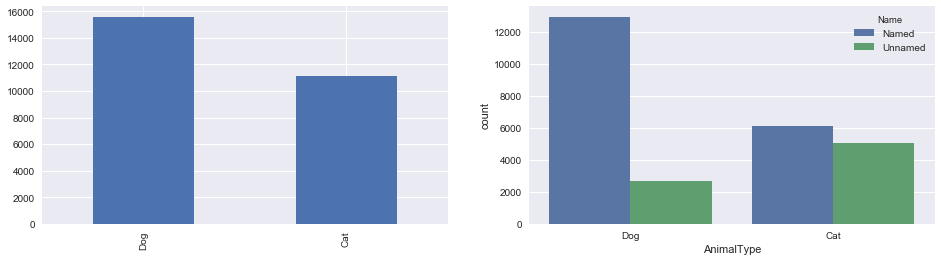

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
df['AnimalType'].value_counts().plot(kind = 'bar', ax=ax1)
sns.countplot(data=df, x='AnimalType', hue='Name', ax=ax2)

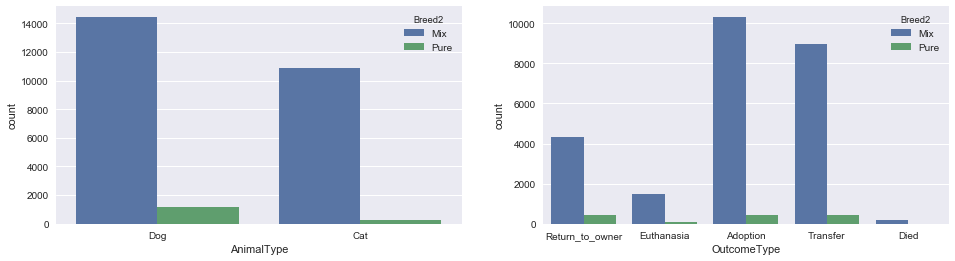

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(data=df, x='AnimalType', hue='Breed2', ax=ax1)
sns.countplot(data=df, x='OutcomeType', hue='Breed2', ax = ax2)

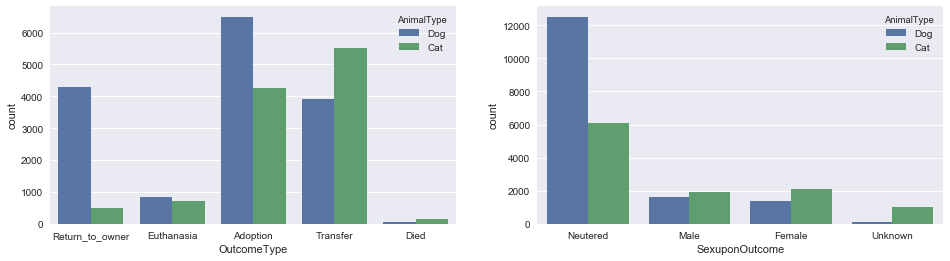

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(data=df, x='OutcomeType', hue='AnimalType', ax = ax1)
sns.countplot(data=df, x='SexuponOutcome', hue='AnimalType', ax=ax2)

* OutcomeType에서 AniamlType별 차이가 크게 발생한다
    * 개는 주인이 되찾아간 비율이 고양이에 비해 확연히 큼
    * 고양이는 입양되거나 다른 시설로 보내진 경우가 많다
    * 보호기간 동안 죽거나 안락사 된 비율은 고양이와 개, 모두 낮다
* SexuponOutcome에서 AnimalType별 차이가 발생한다
    * 개는 성별에 관계없이 중성화된 비율이 높게 나타난다
    * 고양이도 중성화된 비율이 높으나, 크게 차이가 발생하지 않는다
    * 고양이의 경우 성별이 누락된 경우가 있다 (Unknown)

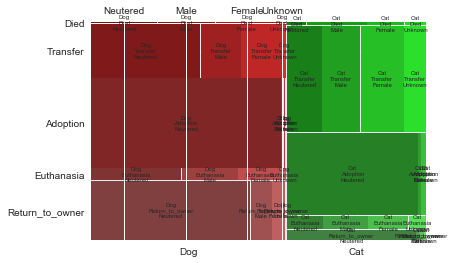

In [43]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 7
mosaic = mosaic(df, ['AnimalType', 'OutcomeType', 'SexuponOutcome'])

* AnimalType에 관계없이, 중성화 된 개체가 Adoption에서 높은 비율을 차지함
* Adoption과 개체의 성별은 상관도가 낮은 것으로 판단됨
* 전반적으로 성별 자체의 영향은 낮은것으로 보이며, Adoption과 Return to owner에만 중성화에 따른 비율이 다르다

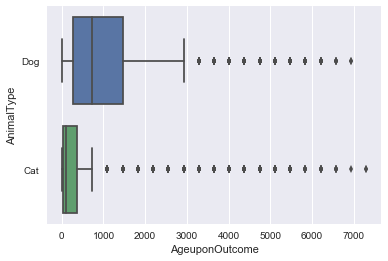

In [44]:
sns.boxplot(x='AgeuponOutcome', y='AnimalType', data = df)

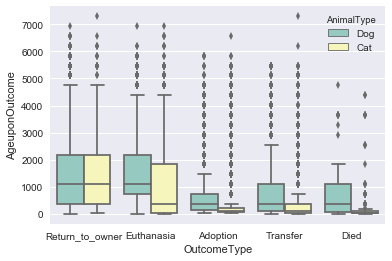

In [45]:
sns.boxplot(x=df['OutcomeType'], y=df['AgeuponOutcome'], hue=df['AnimalType'], palette="Set3")

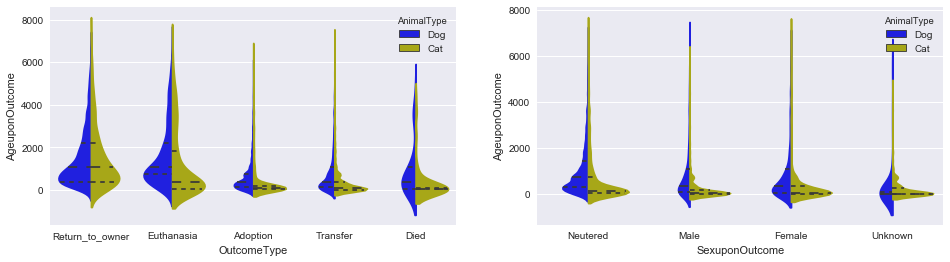

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
sns.violinplot(x="OutcomeType", y="AgeuponOutcome", hue="AnimalType", data=df, split=True,
               inner="quart", palette={"Dog": "b", "Cat": "y"}, ax=ax1)
sns.violinplot(x="SexuponOutcome", y="AgeuponOutcome", hue="AnimalType", data=df, split=True,
               inner="quart", palette={"Dog": "b", "Cat": "y"}, ax=ax2)
sns.despine(left=True)

* 보호소에 어린 고양이가 많이 들어옴
* 따라서 고양이의 OutcomeType은 모두 어린 쪽에 집중되어있다
    * 고양이의 나이는 크게 영향이 없을 것으로 예상됨
    * 단, 나이가 많은 고양이의 경우, 안락사 되는 경우가 있다
    * 고양이는 다쳐서 보호소에 들어오는 경우가 많지 않을까 예상
* 다양한 연령대의 개들이 보호소에 들어옴
    * 입양되는 비율은 어린 개에 집중되어 있으며, 나이가 많을 수록 안락사의 비율이 높았다
    * 개는 고양이에 비해 죽거나 안락사 되는 비율이 적은 것으로 보인다

In [47]:
subset = df[['OutcomeSubtype', 'OutcomeType']]
tuples = [tuple(x) for x in subset.values]

In [48]:
from collections import Counter

val_3=Counter(tuples)

In [40]:
sub_df1 = pd.DataFrame(val_3.values(), columns=['count'], index=pd.MultiIndex.from_tuples(val_3.keys()))
sub_df2 = sub_df1.unstack()
sub_df2.columns = sub_df2.columns.droplevel()  # Drop `count` label.
sub_df2 = sub_df2.div(sub_df2.sum())

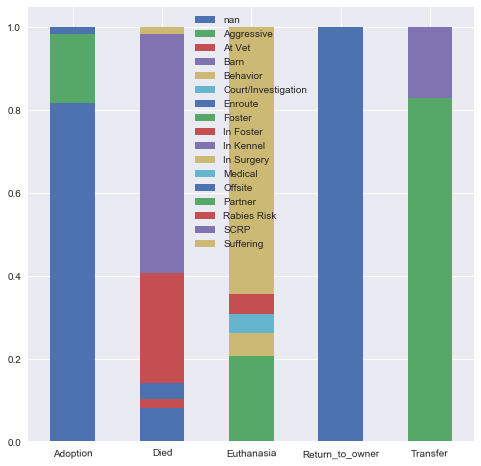

In [41]:
sub_df2.T.plot(kind='bar', stacked=True, rot=1, figsize=(8, 8))

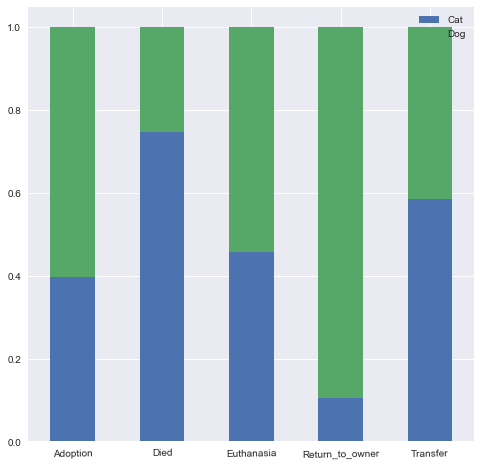

In [42]:
subset = df[['AnimalType', 'OutcomeType']]
tuples = [tuple(x) for x in subset.values]
val_3=Counter(tuples)
sub_df1 = pd.DataFrame(val_3.values(), columns=['count'], index=pd.MultiIndex.from_tuples(val_3.keys()))
sub_df2 = sub_df1.unstack()
sub_df2.columns = sub_df2.columns.droplevel()
sub_df2 = sub_df2.div(sub_df2.sum())

sub_df2.T.plot(kind='bar', stacked=True, rot=1, figsize=(8, 8))

* AnimalType 별 차이가 큼을 확인할 수 있었음
* Name, AgeuponOutcome, SexuponOutcome, OutcomeType 등에서 큰 차이가 있음

<br><br><br><br>

## 더미화

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#df['OutcomeType'] = encoder.fit_transform(df['OutcomeType'])
df['Name'] = encoder.fit_transform(df['Name'])
df['SexuponOutcome'] = encoder.fit_transform(df['SexuponOutcome'])
df['Type'] = encoder.fit_transform(df['Type'])
df['Breed2'] = encoder.fit_transform(df['Breed2'])
df['Color'] = encoder.fit_transform(df['Color'])
df['Breed'] = encoder.fit_transform(df['Breed'])

In [50]:
df.tail()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Breed2,Type,numCol
26724,A702446,1,2015-05-14 11:56:00,Transfer,Partner,Cat,1,30,81,1,0,0,1
26725,A718934,1,2016-01-20 18:59:00,Transfer,SCRP,Cat,2,90,81,1,0,0,0
26726,A698128,0,2015-03-09 13:33:00,Adoption,NaN,Dog,2,1460,146,2,0,0,1
26727,A677478,1,2014-04-27 12:22:00,Transfer,Partner,Cat,1,28,81,1,0,0,0
26728,A706629,1,2015-07-02 09:00:00,Transfer,SCRP,Cat,1,365,81,1,0,0,1


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# 변수선택
* Name, SexuponOutcome, AgeuponOutcome, Breed, Breed2(순종여부), Type(AKC 분류), Color, numCol(색의 혼합도)
* 8개의 변수

In [51]:
X = df[['Name', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Type', 'Breed2', 'Color', 'numCol']]
y = df['OutcomeType']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2)

# Validation

## Random forest
* 우선 Random Forest 를 통하여 Overfitting을 예방하고
* feature importance 기능을 통해 최종변수를 선택하고자 함

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
forest = RandomForestClassifier(n_estimators=300, random_state=2, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [55]:
print("Train Score: {}".format(forest.score(X_train, y_train)))
print("Test Score : {}".format(forest.score(X_test, y_test)))

Train Score: 0.7903821211214207
Test Score : 0.6151428998952566


In [56]:
X.columns

Index(['Name', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Type', 'Breed2',
       'Color', 'numCol'],
      dtype='object')

In [57]:
forest.feature_importances_

array([ 0.07328213,  0.2012572 ,  0.37570976,  0.18795057,  0.06817374,
        0.01240117,  0.06071388,  0.02051154])

* Breed2와 numCol은 importance가 낮아서 제외하고 다시 시도

In [58]:
X = df[['Name', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Type', 'Color']]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [59]:
forest = RandomForestClassifier(n_estimators=300, random_state=2, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [60]:
print("Train Score: {}".format(forest.score(X_train, y_train)))
print("Test Score : {}".format(forest.score(X_test, y_test)))

Train Score: 0.7541155342711763
Test Score : 0.6256172377674697


* Breed2(순종여부)와 numCol(혼합색)을 제거한 뒤 기존 결과인,<br>
    Train Score: 0.790<br>
    Test Score : 0.615<br>
  보다 더 정확한 결과를 도출하였음.

In [61]:
X.columns

Index(['Name', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Type', 'Color'], dtype='object')

In [62]:
forest.feature_importances_

array([ 0.0814858 ,  0.22578012,  0.36808311,  0.1969575 ,  0.06690345,
        0.06079002])

In [63]:
X = df[['Name' ,'SexuponOutcome', 'AgeuponOutcome', 'Breed']]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [64]:
forest = RandomForestClassifier(n_estimators=300, random_state=2, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [65]:
print("Train Score: {}".format(forest.score(X_train, y_train)))
print("Test Score : {}".format(forest.score(X_test, y_test)))

Train Score: 0.7181482590042901
Test Score : 0.6311536734999252


* 뒤이어 Type(AKC분류)과 Color를 제거하였을 때도 Overfitting의 줄면서 Test Score가 높아짐
* Name까지 빼보았으나, 이 경우 정확도가 낮아져 이하 4개의 변수를 최종변수로 선정<br>
** Name, SexuponOutcome, AgeuponOutcome, Breed **

## Classification Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)

In [67]:
clf = clf.fit(X_train, y_train)

In [68]:
print("Train Score: {}".format(clf.score(X_train, y_train)))
print("Test Score : {}".format(clf.score(X_test, y_test)))

Train Score: 0.6292527187468822
Test Score : 0.6335478078707167


## Bagging

In [69]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier())

In [70]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [71]:
print("Train Score: {}".format(bagging.score(X_train, y_train)))
print("Test Score : {}".format(bagging.score(X_test, y_test)))

Train Score: 0.7138581263094882
Test Score : 0.6286099057309591


<br><br>

## Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.05, n_estimators=300)

In [73]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [74]:
print("Train Score: {}".format(gbrt.score(X_train, y_train)))
print("Test Score : {}".format(gbrt.score(X_test, y_test)))

Train Score: 0.6599820413049985
Test Score : 0.6522519826425258


In [75]:
gbrt2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01, n_estimators=1000)
gbrt2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [76]:
print("Train Score: {}".format(gbrt2.score(X_train, y_train)))
print("Test Score : {}".format(gbrt2.score(X_test, y_test)))

Train Score: 0.6546942033323356
Test Score : 0.6512045488553045


<br><br>

## XGBoost

In [77]:
import xgboost as xgb
xgbr = xgb.XGBClassifier(n_estimators=400)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [78]:
xgbr.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [79]:
print("Train Score: {}".format(xgbr.score(X_train, y_train)))
print("Test Score : {}".format(xgbr.score(X_test, y_test)))

Train Score: 0.660580664471715
Test Score : 0.6555439174023642


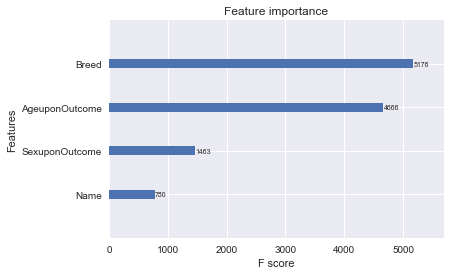

In [80]:
xgb.plot_importance(xgbr)

<br><br>

### Gradient Boosting과 XGBoost를 최종 모델로 선정

<br><br>

## Cross validation
* 두 모델 중 어떤 모델이 더 적합한 모델인가 확인이 필요
* Shelter data는 예측해야 할 Outcome의 편차가 존재한다.
* Cross validation과 함께 Kfold도 수행하여 편차의 발생을 확인한다.

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

#### Gradient Boosting CV

In [83]:
scores = cross_val_score(gbrt, X, y, cv = kfold)
print(scores)

[ 0.64796109  0.63786008  0.66068088  0.65787505  0.63723106]


In [84]:
scores = cross_val_score(gbrt, X, y, cv = 5)
print(scores)

[ 0.64977562  0.64204227  0.64228251  0.64359214  0.65774701]


#### XGBoost CV

In [85]:
scores = cross_val_score(xgbr, X, y, cv = kfold)
print(scores)

[ 0.65151515  0.64178825  0.66068088  0.66068088  0.63854069]


In [86]:
scores = cross_val_score(xgbr, X, y, cv = 5)
print(scores)

[ 0.65351533  0.64185525  0.64434051  0.64976614  0.65681138]


<br><br><br><br><br>

## 한 번만 더...

In [81]:
X2 = df[['Name', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Type']]

In [114]:
scores = cross_val_score(gbrt, X2, y, cv = kfold)
print(scores)

[ 0.64945754  0.63879536  0.65899738  0.65862327  0.63910196]


In [115]:
scores = cross_val_score(xgbr, X2, y, cv = kfold)
print(scores)

[ 0.65076693  0.64272353  0.65955855  0.66199027  0.63891487]


<br>
# Test set 적용

In [50]:
test = pd.read_csv('data/test.csv')

In [51]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [52]:
test['Name'] = test['Name'].transform(Naming)

In [53]:
test['SexuponOutcome'] = test['SexuponOutcome'].fillna('Unknown')
test['SexuponOutcome'] = test['SexuponOutcome'].apply(intact)

In [54]:
test['AgeuponOutcome'] = test['AgeuponOutcome'].fillna('0 day')
test['AgeuponOutcome'] = test['AgeuponOutcome'].apply(Agebyday)

In [55]:
test['Breed'] = test['Breed'].apply(breed_optimal)

In [56]:
test['Breed'] = test['Breed'].replace('Pit Bull', 'Bull Terrier')
test['Breed'] = test['Breed'].replace('German Shepherd', 'German Shepherd Dog')
test['Breed'] = test['Breed'].replace('Anatol Shepherd', 'Anatolian Shepherd Dog')
test['Breed'] = test['Breed'].replace('Catahoula', 'Catahoula Cur')
test['Breed'] = test['Breed'].replace('Staffordshire', 'American Staffordshire Terrier')
test['Breed'] = test['Breed'].replace('Doberman Pinsch', 'Doberman Pinscher')
test['Breed'] = test['Breed'].replace('Queensland Heeler', 'Australian Cattle Dog')
test['Breed'] = test['Breed'].replace('Flat Coat Retriever', 'Flat-Coated Retriever')
test['Breed'] = test['Breed'].replace('Chinese Sharpei', 'Chinese Shar Pei')
test['Breed'] = test['Breed'].replace('Rhod Ridgeback', 'Rhodesian Ridgeback')
test['Breed'] = test['Breed'].replace('Soft Coated Wheaten Terrier', 'Soft-Coated Wheaten Terrier')
test['Breed'] = test['Breed'].replace('Bruss Griffon', 'Brussels Griffon')
test['Breed'] = test['Breed'].replace('Redbone Hound', 'Redbone Coonhound')
test['Breed'] = test['Breed'].replace('West Highland', 'West Highland White Terrier')
test['Breed'] = test['Breed'].replace('Wire Hair Fox Terrier', 'Wire Fox Terrier')
test['Breed'] = test['Breed'].replace('Dogo Argentino', 'Mastiff')
test['Breed'] = test['Breed'].replace('Alaskan Husky', 'Alaskan Malamute')
test['Breed'] = test['Breed'].replace('Pbgv', 'Petit Basset Griffon Vendeen')
test['Breed'] = test['Breed'].replace('Chesa Bay Retr', 'Chesapeake Bay Retriever')
test['Breed'] = test['Breed'].replace('Cavalier Span', 'Cavalier King Charles Spaniel')
test['Breed'] = test['Breed'].replace('Dutch Shepherd', 'Dutch Shepherd Dog')
test['Breed'] = test['Breed'].replace('English Coonhound', 'American English Coonhound')
test['Breed'] = test['Breed'].replace('American Eskimo', 'American Eskimo Dog')
test['Breed'] = test['Breed'].replace('Bluetick Hound', 'Bluetick Coonhound')
test['Breed'] = test['Breed'].replace('Patterdale Terr', 'Patterdale Terrier')
test['Breed'] = test['Breed'].replace('Chinese Crested', 'Chinese Crested Dog')
test['Breed'] = test['Breed'].replace('Podengo Pequeno', 'Portuguese Podengo Pequeno')
test['Breed'] = test['Breed'].replace('Dogue De Bordeaux', 'Dogue de Bordeaux')
test['Breed'] = test['Breed'].replace('Boykin Span', 'Boykin Spaniel')
test['Breed'] = test['Breed'].replace('Landseer', 'Newfoundland')
test['Breed'] = test['Breed'].replace('Schnauzer Giant', 'Giant Schnauzer')
test['Breed'] = test['Breed'].replace('Glen Of Imaal', 'Glen of Imaal Terrier')
test['Breed'] = test['Breed'].replace('Treeing Cur', 'Treeing Walker Coonhound')
test['Breed'] = test['Breed'].replace('Bedlington Terr', 'Bedlington Terrier')
test['Breed'] = test['Breed'].replace('Picardy Sheepdog', 'Berger Picard')
test['Breed'] = test['Breed'].replace('Presa Canario', 'Mastiff')
test['Breed'] = test['Breed'].replace('Nova Scotia Duck Tolling Retriever', 'Nova Scotia Duck-Tolling Retriever')
test['Breed'] = test['Breed'].replace('Port Water Dog', 'Portuguese Water Dog')
test['Breed'] = test['Breed'].replace('Mexican Hairless', 'American Hairless Terrier')
test['Breed'] = test['Breed'].replace('Treeing Tennesse Brindle', 'Treeing Walker Coonhound')
test['Breed'] = test['Breed'].replace('Entlebucher', 'Entlebucher Mountain Dog')
test['Breed'] = test['Breed'].replace('Sealyham Terr', 'Sealyham Terrier')
test['Breed'] = test['Breed'].replace('Black', 'Black and Tan Coonhound')
test['Breed'] = test['Breed'].replace('Unknown', 'Chihuahua Shorthair')

In [57]:
test = test.join(Breed.set_index('Breed'), on='Breed')

In [58]:
test['Type'] = test['Type'].fillna('Cat')

In [59]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type
0,1,Named,2015-10-12 12:15:00,Dog,Female,300,Labrador Retriever,Red/White,Sporting
1,2,Named,2014-07-26 17:59:00,Dog,Neutered,730,German Shepherd Dog,Black/Tan,Herding
2,3,Named,2016-01-13 12:20:00,Cat,Neutered,365,Domestic Shorthair,Brown Tabby,Cat
3,4,Named,2013-12-28 18:12:00,Dog,Male,120,Collie Smooth,Tricolor,Cat
4,5,Named,2015-09-24 17:59:00,Dog,Neutered,730,Miniature Poodle,White,Cat


In [75]:
test['Name'] = encoder.fit_transform(test['Name'])
test['SexuponOutcome'] = encoder.fit_transform(test['SexuponOutcome'])
test['Breed'] = encoder.fit_transform(test['Breed'])
test['Type'] = encoder.fit_transform(test['Type'])

In [84]:
test_X = test[['Name' ,'SexuponOutcome', 'AgeuponOutcome', 'Breed']]
test_X2 = test[['Name' ,'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Type']]

In [85]:
predict_gbrt = gbrt.predict_proba(test_X)
predict_xgbr = xgbr.predict_proba(test_X)

In [90]:
submit_gbrt = pd.DataFrame(predict_gbrt, columns=gbrt.classes_)
submit_xgbr = pd.DataFrame(predict_xgbr, columns=xgbr.classes_)

In [91]:
submit_gbrt.index += 1
submit_xgbr.index += 1

In [92]:
submit_gbrt.head()

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
1,0.069331,0.004810,0.034315,0.172593,0.718951
2,0.511561,0.003153,0.024715,0.261201,0.199371
3,0.493624,0.002232,0.011921,0.118260,0.373962
4,0.084527,0.013613,0.042113,0.101671,0.758076
5,0.461537,0.001646,0.015391,0.349697,0.171729


In [93]:
submit_xgbr.head()

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
1,0.082620,0.002761,0.027416,0.169311,0.717892
2,0.494280,0.003576,0.025928,0.303377,0.172839
3,0.497590,0.001891,0.013017,0.102482,0.385020
4,0.129255,0.012733,0.046797,0.064167,0.747048
5,0.426743,0.001063,0.007294,0.399544,0.165356


In [94]:
submit_gbrt.to_csv('data/submit_gbrt.csv')
submit_xgbr.to_csv('data/submit_xgbr.csv')

<br><br><br><br><br><br><br><br><br><br><div style="text-align:center"><span style = " font-size:30px">Gradient Boost : 0.86735<br><br>XGBoost : 0.86583<br><br>**850/1600**</span></div>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# 번외

In [313]:
df2 = pd.read_csv('data/train.csv')

In [317]:
def Samoyed(x):
    if 'Samoyed' in x:
        return 'Samoyed'

In [318]:
df2['Breed'] = df2['Breed'].apply(Samoyed)

In [326]:
Samoyed = df2[df2['Breed'] == 'Samoyed']

In [327]:
Samoyed

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
7652,A681923,Harley,2014-06-23 11:42:00,Return_to_owner,NaN,Dog,Neutered Male,14 years,Samoyed,White
17259,A696454,Polar,2015-02-19 15:55:00,Euthanasia,Suffering,Dog,Neutered Male,11 years,Samoyed,White
23624,A685849,NaN,2014-08-23 16:29:00,Adoption,NaN,Dog,Spayed Female,1 year,Samoyed,White
